
test Attention implementation
---------------------------------------------
token shape: torch.Size([8, 512, 128])
output shape: torch.Size([8, 512, 128])
---------------------------------------------

test PositionalEncoding


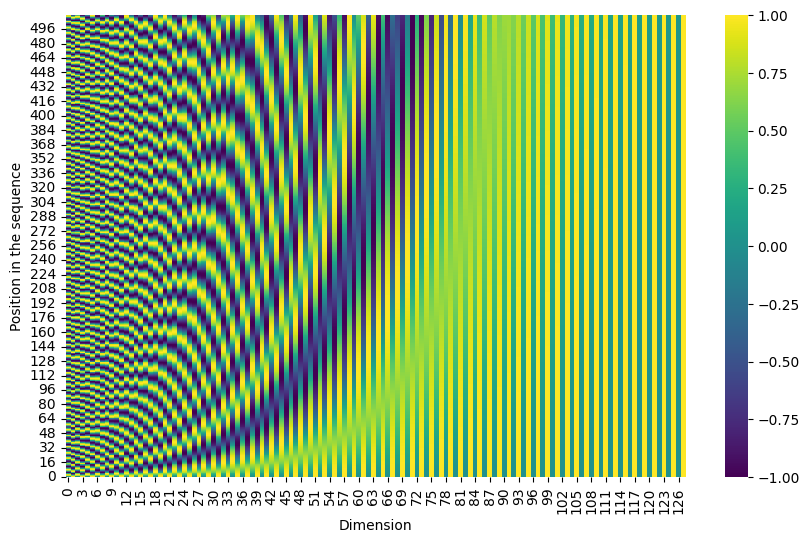



test TransformerClassifier implementation
---------------------------------------------
input sequence shape: torch.Size([8, 512])
Should be batch_sz x seq_len ie. (8,512)
classifier output shape: torch.Size([8, 2])
should be batch_sz x 2 ie. (8,2)
Output should be binary (positive/negative), ie. seq_len x 2
---------------------------------------------


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from transformer import Attention, PositionalEncoding, TransformerClassifier
from text_classification import prepare_data_iter, set_seed

def test_attention(batch_size=16, seq_len=512, embed_dim=128, device='cpu'):

    # token: batch_size x seq_len x embed_dim
    token = torch.rand(batch_size, seq_len, embed_dim).to(device)
    
    attention = Attention(embed_dim=128, num_heads=8)
    attention = attention.to(device)
    output = attention(token)

    assert output.size() == (batch_size, seq_len, embed_dim)

    print(f'token shape: {token.shape}')
    print(f'output shape: {output.shape}')

def test_transformer(batch_size=16, seq_len=512, num_classes=2, device='cpu'):

    # input sequence: batch_size x seq_len
    inpput_seq = torch.randint(low=0, high=50_000, size=(batch_size, seq_len)).to(device)
    transformer_cls = TransformerClassifier(num_classes=num_classes, max_seq_len=512, embed_dim=128, 
                                            num_heads=8, num_layers=2, pos_enc='fixed', pool='max'
    )
    transformer_cls = transformer_cls.to(device)
    output = transformer_cls(inpput_seq)
    
    assert output.size() == (batch_size, num_classes)

    print(f'input sequence shape: {inpput_seq.shape}')
    print("Should be batch_sz x seq_len ie. (8,512)")
    print(f'classifier output shape: {output.shape}')
    print("should be batch_sz x 2 ie. (8,2)")

def test_positional_encoding(embed_dim=128, max_seq_len=512):

    plt.figure(figsize=(10, 6))

    # positional encoding for a embed_dim-dimensional vector 
    pe = PositionalEncoding(embed_dim=embed_dim, max_seq_len=max_seq_len)

    # token input: batch_size x sequence_length x embed_dim
    token = torch.zeros(1, max_seq_len, embed_dim)
    positions = pe(token)

    # Each row in the plot corresponds to the vector we are adding 
    # to our embedding vector when the word is at that position in the sentence
    sns.heatmap(positions.squeeze(0), cmap=sns.color_palette("viridis", as_cmap=True))
    plt.xlabel('Dimension')
    plt.ylabel('Position in the sequence')
    plt.gca().invert_yaxis()
    plt.show()

    
if __name__ == '__main__':
    set_seed(5)
    train_iter, _ = prepare_data_iter(batch_size=2)
    batch = next(iter(train_iter))
    for i in range(2):
        example = batch.dataset.examples[i]
        review = ' '.join(example.text)
        label = example.label

        print('-'*10,f'Review {i+1}','-'*10)
        print(review)
        print(f'Label: {label}')

    print()
    print('test Attention implementation')
    print(45*'-')
    test_attention(batch_size=8, seq_len=512, embed_dim=128, device='cpu')
    print(45*'-')

    print()
    print('test PositionalEncoding')
    test_positional_encoding()
    print()

    print()
    print('test TransformerClassifier implementation')
    print(45*'-')
    test_transformer(batch_size=8, seq_len=512, num_classes=2, device='cpu') 
    print("Output should be binary (positive/negative), ie. seq_len x 2")
    print(45*'-')